# 1-4 Thinking probabilistically - Continuous Variables


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## The normal distribution

### The normal PDF

In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

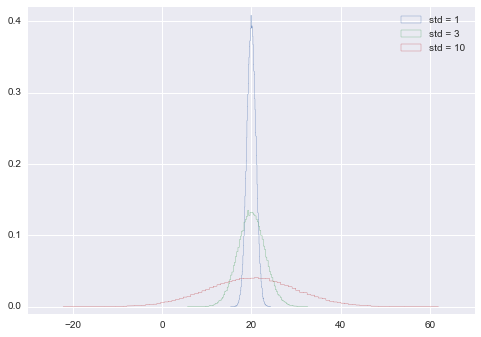

In [3]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, label='std1', normed=True, histtype='step', bins=100)
_ = plt.hist(samples_std3, label='std3', normed=True, histtype='step', bins=100)
_ = plt.hist(samples_std10, label='std10', normed=True, histtype='step', bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### The normal CDF

Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

In [4]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / float(len(x))
    return (x,y)

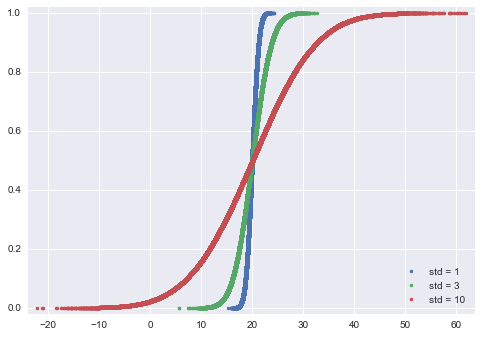

In [5]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


### Are the Belmont Stakes results Normally distributed?

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

In [6]:
belmont_no_outliers = np.array([ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ])

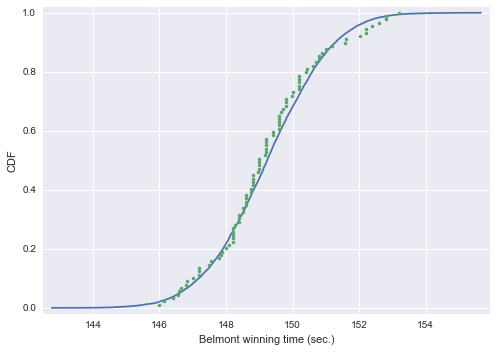

In [8]:
# Compute mean and standard deviation: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


### What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [9]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / float(len(samples))

# Print the result
print('Probability of besting Secretariat:', prob)


('Probability of besting Secretariat:', 0.00060800000000000003)


## The Exponential CDF

### If you have a story, you can simulate it!

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [10]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of first exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

### Distribution of no-hitters and cycles

Now, you'll use your sampling function to compute the waiting time to observer a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

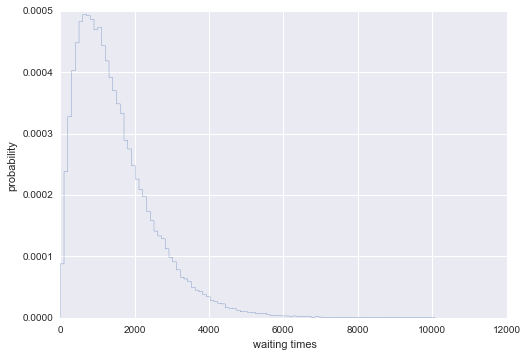

In [16]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, normed=True, histtype='step')

# Set margins and label axes
_ = plt.xlabel(' waiting times')
_ = plt.ylabel('probability')

# Show the plot
plt.show()